# Get Loss

In [30]:
import os
import matplotlib.pyplot as plt
s = 720000 / 2856


In [84]:
OUT1 = '/home/max/mrcnn_b_work/OUT/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190310_offline_augment/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190408_r-101_offline/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190424_lr_000125_offline_augment/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190501_nucl_r101_0_00125/'
OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190315_poly_t/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190412_poly_t_r101/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190423_transfer_ale/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190507_polyt_failed/'
#print(os.listdir(OUT))
out_file1 = '20190501_polyt_r50_lr000015.out'
out_file = 'log.txt'
#out_file2 = '20190313_offline_augment_continue.out'
print(OUT + out_file)
lines_loss = [line for line in open(OUT + out_file) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']
#lines_loss2 = [line for line in open(OUT + out_file2) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']
#lines_loss = lines_loss + lines_loss2
result_folder = '/home/max/mrcnn_b_work/results/'
print(os.listdir(result_folder))

/data/proj/smFISH/Students/Max_Senftleben/files/models/20190315_poly_t/log.txt
['out_polyt_r50_lr000125.txt', 'inference', 'out_polyt_r101_lr000125.txt', 'out_nuclei_r50_lr000125.txt', 'out_nuclei_r101_000125.txt', 'out_polyt_r50_lr0005.txt', 'out_nuclei_r50_lr000125_transfer.txt', 'out_nuclei_r101.txt', 'out_nuclei_r152.txt', 'out_nuclei_r50.txt', 'out_polyt_r101.txt', 'out_polyt_r152.txt', 'out_polyt_r50.txt', 'out_nuclei_r50_transfer_new.txt', 'out_polyt_r101_new.txt', 'out_polyt_r50_new_test_all.txt']


### one line
2019-02-21 15:32:52,678 maskrcnn_benchmark.trainer INFO: eta: 22:59:49  iter: 384020  loss: 0.0335 (0.1234)  loss_classifier: 0.0055 (0.0265)  loss_box_reg: 0.0033 (0.0149)  loss_mask: 0.0254 (0.0720)  loss_objectness: 0.0000 (0.0073)  loss_rpn_box_reg: 0.0003 (0.0027)  time: 0.2530 (0.2464)  data: 0.0052 (0.0066)  lr: 0.002500  max mem: 2280

In [85]:
import matplotlib.pyplot as plt
import os
ROOT = '/home/max/'
import matplotlib.pylab as pylab


print(os.listdir(ROOT))

['.bash_logout', '.bash_profile', '.bashrc', '.ssh', '.config', '.bash_history', 'github', '.pki', 'anaconda3', '.bashrc-anaconda3.bak', '.conda', '.cache', '.ipython', '.keras', '.nv', '.python_history', '.jupyter', '.local', 'submit_jupyter', '.torch', '.gitconfig', 'downloads', 'gcc-5.2.0', 'objdir', 'submit_jupyter_gpu', 'submit_jupyter_gpu_matter', 'Untitled.ipynb', '.ipynb_checkpoints', 'mrcnn_b_work', 'local_dir2monod.rsync.log', 'inference']


In [86]:
losses = []
iterations = []
eta = []
indexes = []
lr = []
loss_classifier = []
loss_box_reg = []
loss_mask = []
loss_objectness = []
loss_rpn_box_reg = []

days_to_hours = {}
for i in range(11):
    days_to_hours[i] = i * 24
    
for i, one_line in enumerate(lines_loss):
    elements = one_line.split()
    indexes.append(i)
    if len(elements) == 39:
        
        losses.append(float(elements[11]))
        iterations.append(int(elements[9]))
        lr.append(float(elements[35]))
        time = days_to_hours[int(elements[5])] + int(elements[7].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[14]))
        loss_box_reg.append(float(17))
        loss_mask.append(float(20))
        loss_objectness.append(float(23))
        loss_rpn_box_reg.append(float(26))
        
    elif len(elements) == 37:
        
        losses.append(float(elements[9]))
        iterations.append(int(elements[7]))
        lr.append(float(elements[33]))
        time = int(elements[5].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[12]))
        loss_box_reg.append(float(15))
        loss_mask.append(float(18))
        loss_objectness.append(float(21))
        loss_rpn_box_reg.append(float(24))
        
norm_time = [(max(eta) - i) for i in eta]
norm_iterations = [i / 100000 for i in iterations]
#print(min(losses))




In [87]:
def eval_vali(fil):
    print(fil)
    with open(fil) as op:
        all_lines = [i for i in op]
    
    model = [i.split('/')[-1] for i in all_lines if i.startswith('  WEIGHT: /data')]
    models2 = []
    #models2.append(0)
    for i in model:
        sd = i.split('_')[-1].split('.')[0]
        if sd == 'final':
            models2.append(720000)
        elif sd == 'trimmed':
            continue        
        else:
            models2.append(int(sd))

    #model = [int(i.split('_')[-1].split('.')[0]) for i in model]
    av_iou = [float(i.split()[-1]) for i in all_lines if i.startswith('average IoU all')]

    av_ap = [float(i.split()[-1]) for i in all_lines if i.startswith(' Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100')]

    av_ap2 = [float(i.split()[-1]) for i in all_lines if i.startswith(' Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100')]
    #print(len(av_iou), len(av_ap), len(models2))
    avs_ap2 = []
    avs_iou = []
    avs_ap = []
    models = []
    avs_iou.append(0)
    models.append(0)
    avs_ap.append(0)
    for i in range(len(models2)-30):
        models.append(models2[i])
        #models.append(model[i])
        #avs_iou.append(av_iou[i*2])
        avs_iou.append((av_iou[i*2+1] + av_iou[i*2])/2)
        #avs_ap.append(av_ap[i*2])
        avs_ap.append((av_ap[i*2+1] + av_ap[i*2])/2)
        avs_ap2.append((av_ap2[i*2+1] + av_ap2[i*2])/2)
    ap_max = 0
    iou_max = 0
    it_max = 0
    ap2_max  = 0
    for i in range(len(avs_iou)):
        if avs_iou[i]>iou_max:
            iou_max = avs_iou[i]
            it_max = models[i]
            ap_max = avs_ap[i]
            ap2_max = avs_ap2[i]
    print('it', it_max)
    print('iou',iou_max, max(avs_iou))
    print('AP.5', ap_max)
    print('AP.95', ap2_max)
    #for i in range(len(models)-10):
        #print(models[i], avs_iou[i])
    return models, avs_iou

In [88]:
def plot_eval(file, iterat, loss):
    
    # get the values
    models, avs_iou = eval_vali(file)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex=True)
    
    ax = axs[0]
    ax.axis([-10000, 600000, 0, 1])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Training Loss')
    ax.plot(iterat, loss)
    
    ax = axs[1]
    ax.axis([-10000, 600000, 0, 1])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Testing accuracy')
    ax.plot(models, avs_iou, color='g')
    
    fig.tight_layout()
    plt.show()
       

/home/max/mrcnn_b_work/results/out_polyt_r50.txt
it 440000
iou 0.6063481959927302 0.6063481959927302
AP.5 0.2205
AP.95 0.4515


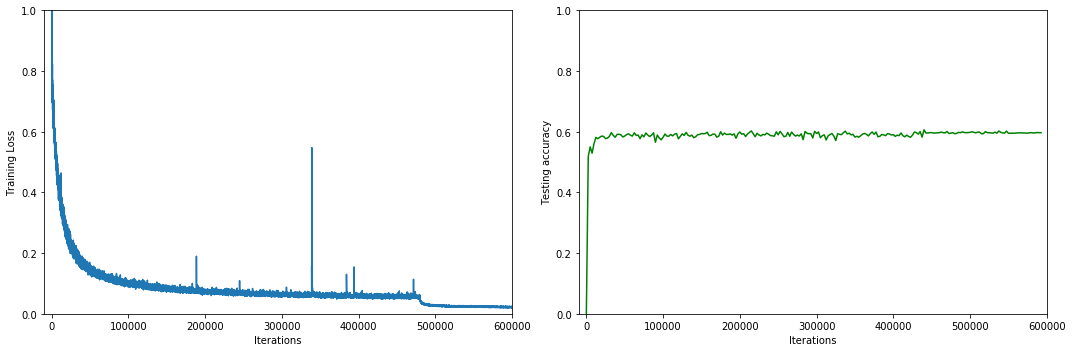

"\n['out_polyt_r50_lr000125.txt', 'inference', 'out_polyt_r101_lr000125.txt', 'out_nuclei_r50_lr000125.txt', \n'out_nuclei_r101_000125.txt', 'out_polyt_r50_lr0005.txt', 'out_nuclei_r50_lr000125_transfer.txt', \n'out_nuclei_r101.txt', 'out_nuclei_r152.txt', 'out_nuclei_r50.txt', 'out_polyt_r101.txt', 'out_polyt_r152.txt', 'out_polyt_r50.txt']\n"

In [89]:
pylab.rcParams['figure.figsize'] = 15, 5
plot_eval('/home/max/mrcnn_b_work/results/out_polyt_r50.txt', iterations, losses)
'''
['out_polyt_r50_lr000125.txt', 'inference', 'out_polyt_r101_lr000125.txt', 'out_nuclei_r50_lr000125.txt', 
'out_nuclei_r101_000125.txt', 'out_polyt_r50_lr0005.txt', 'out_nuclei_r50_lr000125_transfer.txt', 
'out_nuclei_r101.txt', 'out_nuclei_r152.txt', 'out_nuclei_r50.txt', 'out_polyt_r101.txt', 'out_polyt_r152.txt', 'out_polyt_r50.txt']
'''

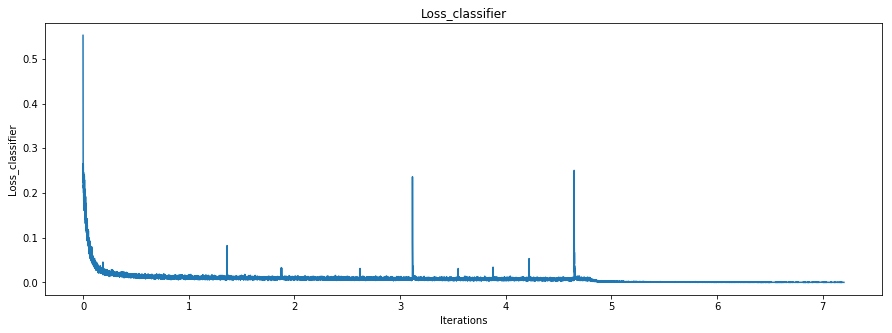

In [51]:
plt.figure()

plt.plot(norm_iterations, loss_classifier)
plt.ylabel('Loss_classifier')
plt.title('Loss_classifier')
plt.xlim()
plt.xlabel('Iterations')
plt.show()

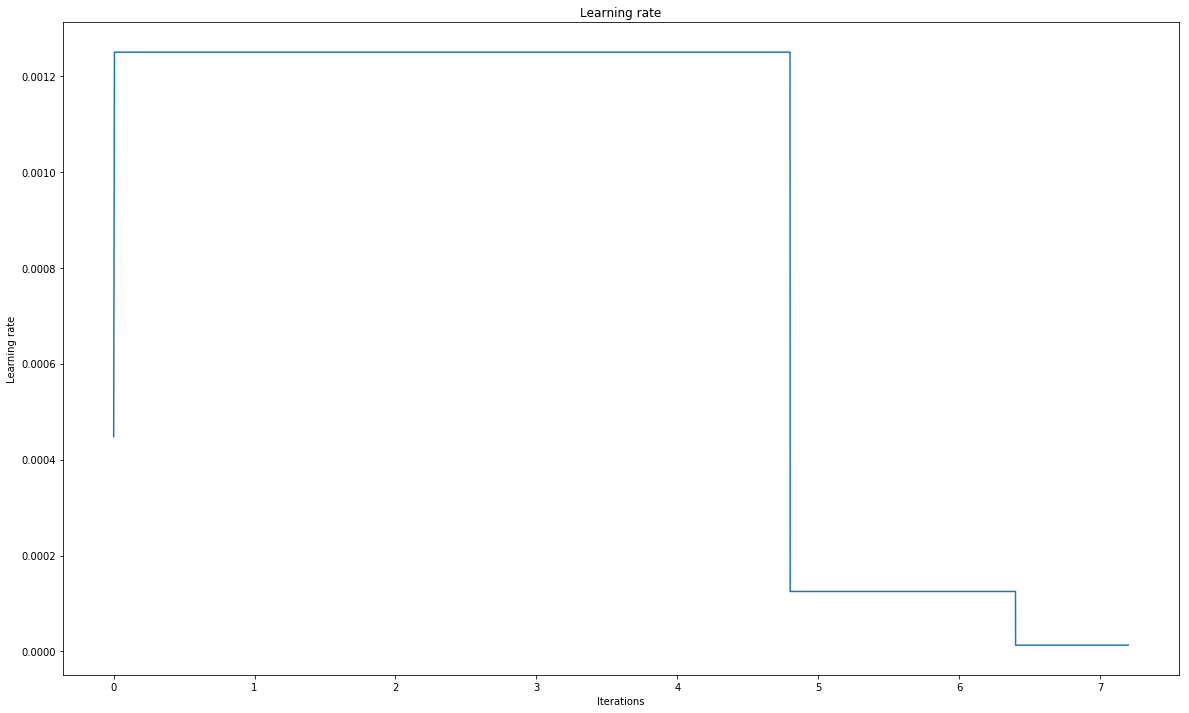

In [249]:
plt.figure()

plt.plot(norm_iterations, lr)

plt.ylabel('Learning rate')
plt.xlabel('Iterations')
plt.title("Learning rate")
plt.show()

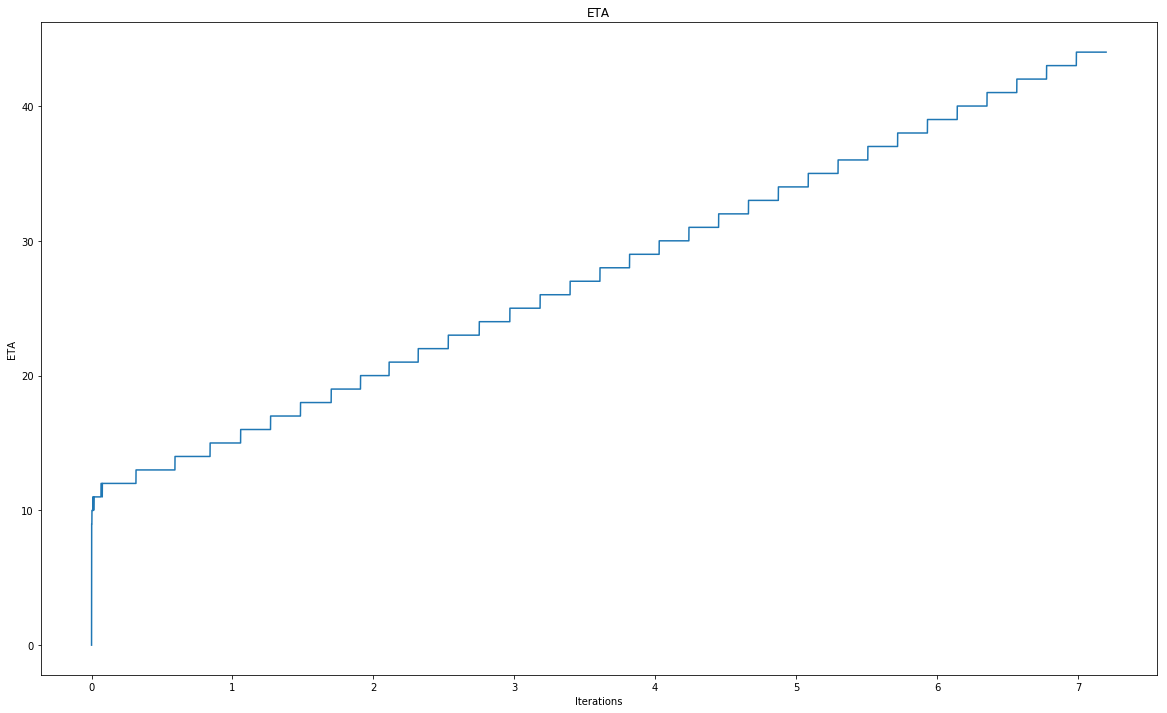

In [250]:
plt.figure()

plt.plot(norm_iterations, norm_time)
plt.ylabel('ETA')
plt.xlabel('Iterations')
plt.title("ETA")
plt.show()

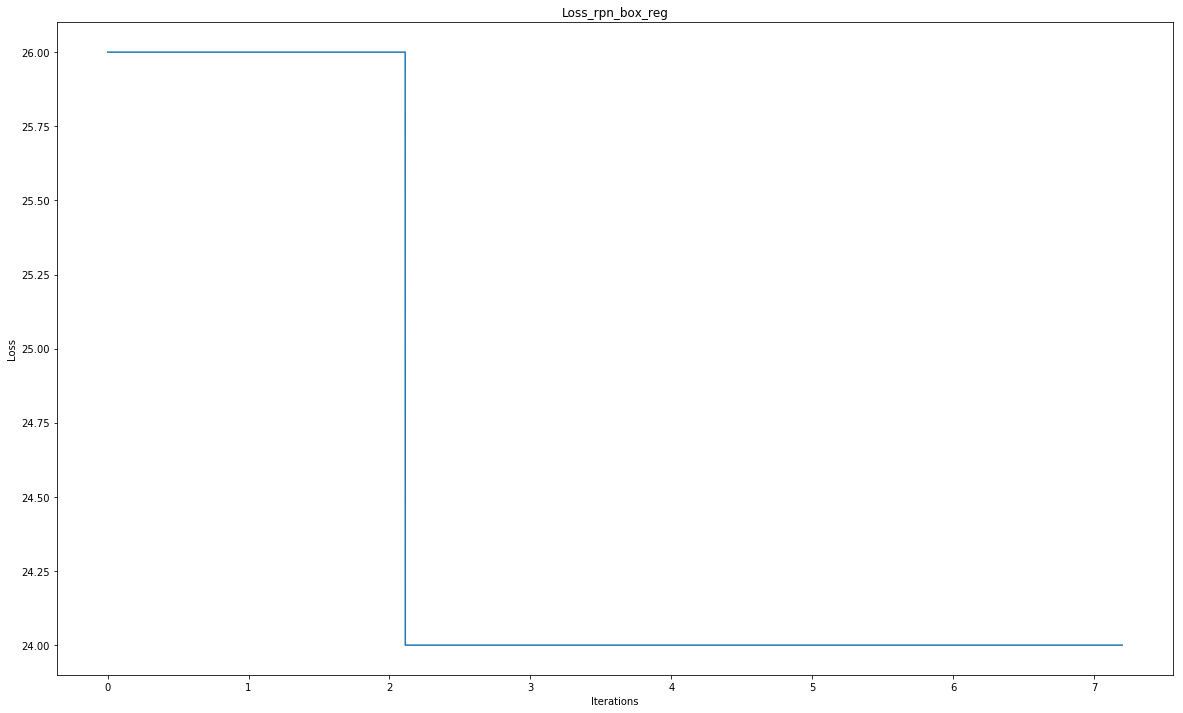

In [251]:
plt.figure()

plt.plot(norm_iterations, loss_rpn_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title("Loss_rpn_box_reg")
plt.show()

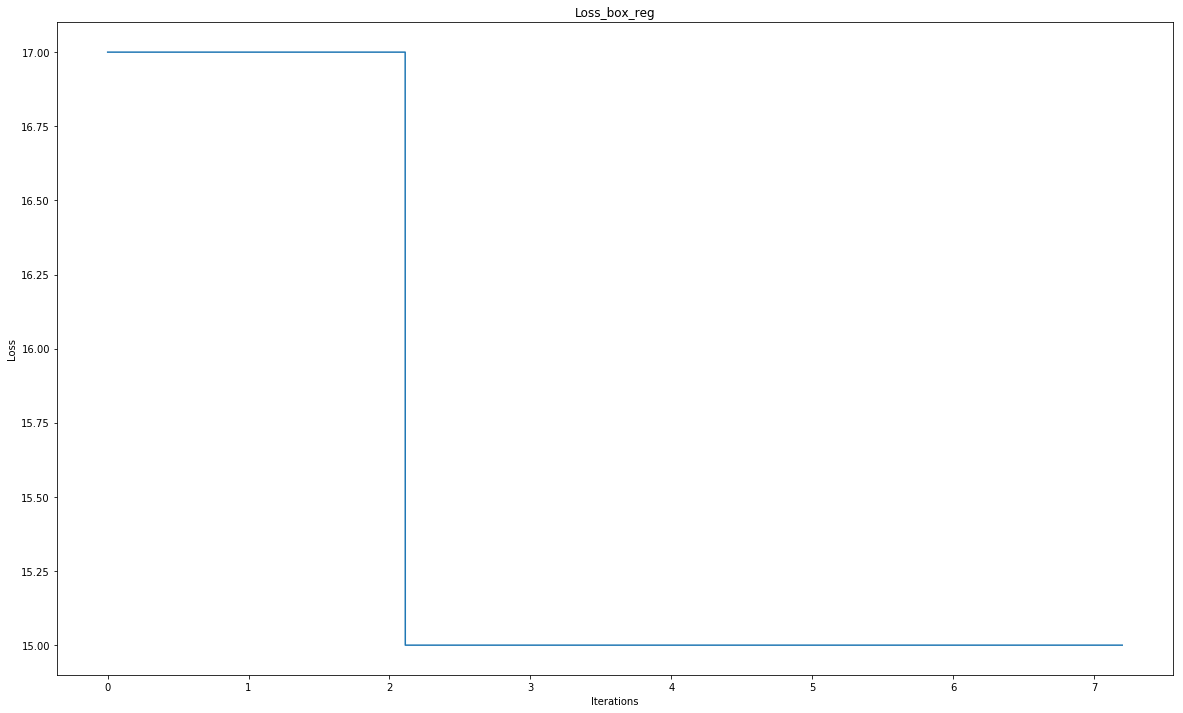

In [252]:
plt.figure()

plt.plot(norm_iterations, loss_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss_box_reg')
plt.show()

In [253]:
# cp file
models = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190306_coco_complete_popped/'
print(os.listdir(models))

FileNotFoundError: [Errno 2] No such file or directory: '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190306_coco_complete_popped/'